In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-probabilities/cancer-probabilities.csv


## ADVICE:

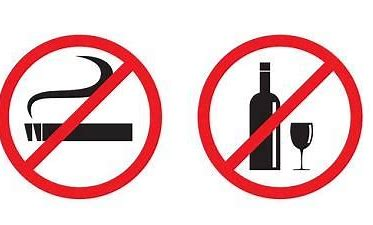

Image Source : Google

In [2]:
# LET THE NOTEBOOK BE CLEAN
import warnings
warnings.filterwarnings('ignore')

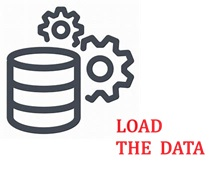

In [3]:
df=pd.read_csv("/kaggle/input/cancer-probabilities/cancer-probabilities.csv")

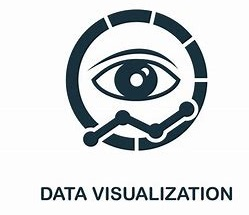

In [4]:
df.head(20)

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,1,Heavy,Frequent,Low,Low,Low,0.80
1,2,Occasional,Moderate,High,High,High,0.20
2,3,NaN,NaN,High,High,High,0.10
3,4,Heavy,Frequent,Low,Low,Low,0.90
4,5,Moderate,Occasional,Medium,Medium,Medium,0.40
5,6,NaN,NaN,High,High,High,0.05
6,7,Heavy,Frequent,Low,Low,Low,0.75
7,8,Moderate,Occasional,Medium,Medium,Medium,0.30
8,9,NaN,NaN,High,High,High,0.02
9,10,Heavy,Frequent,Low,Low,Low,0.85


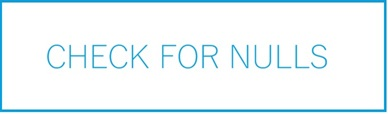

In [5]:
df.isnull().sum()

Sr No.                    0
Smoking Habit            16
Drinking Habit           16
Biking Habit              0
Walking Habit             0
Jogging Habit             0
Probability of Cancer     0
dtype: int64

#### *Smoking Habit and Drinking Habit have Null Values. These Nulls ( as per the data description, suggest that the person doesn't smoke or drink*

# Total Rows and Columns 

In [6]:
print(" Total Rows in the data are {0} and Columns are {1}".format(df.shape[0],df.shape[1]))

 Total Rows in the data are 50 and Columns are 7


### *Replace the Null Values in Smoking And Drinking Column as "None" ( which means he doesn't drink / smoke)*

In [7]:
df['Smoking Habit'].fillna("None",inplace=True)
df['Drinking Habit'].fillna("None",inplace=True)

In [8]:
df.head()

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,1,Heavy,Frequent,Low,Low,Low,0.8
1,2,Occasional,Moderate,High,High,High,0.2
2,3,None,None,High,High,High,0.1
3,4,Heavy,Frequent,Low,Low,Low,0.9
4,5,Moderate,Occasional,Medium,Medium,Medium,0.4


In [9]:
## Creating a Copy just in case our data gets modified unintentionally
df2=df.copy()

In [10]:
df['Drinking Habit'].value_counts()

Drinking Habit
Frequent      17
None          16
Occasional    16
Moderate       1
Name: count, dtype: int64

In [11]:
df['Smoking Habit'].value_counts()

Smoking Habit
Heavy         17
None          16
Moderate      16
Occasional     1
Name: count, dtype: int64

In [12]:
df['Biking Habit'].value_counts()

Biking Habit
Low       17
High      17
Medium    16
Name: count, dtype: int64

In [13]:
df['Walking Habit'].value_counts()

Walking Habit
Low       17
High      17
Medium    16
Name: count, dtype: int64

In [14]:
df['Jogging Habit'].value_counts()

Jogging Habit
Low       17
High      17
Medium    16
Name: count, dtype: int64

In [15]:
# Changing the values of Smoking, Drinking to High, Medium and Low, just to introduce uniformity in Data
def uniformity(x):
    if x=='Heavy':
        return 'High'
    elif x=='Moderate':
        return 'Medium'
    elif x=='Occasional':
        return 'Low'
    else:
         return "None"

df['Smoking Habit']=df['Smoking Habit'].apply(lambda s:uniformity(s))
df['Drinking Habit']=df['Drinking Habit'].apply(lambda s:uniformity(s))


In [16]:
df.head()

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,1,High,None,Low,Low,Low,0.8
1,2,Low,Medium,High,High,High,0.2
2,3,None,None,High,High,High,0.1
3,4,High,None,Low,Low,Low,0.9
4,5,Medium,Low,Medium,Medium,Medium,0.4


In [17]:
X=df[['Smoking Habit','Drinking Habit','Biking Habit','Walking Habit','Jogging Habit']]

In [18]:
X.head()

,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit
0,High,None,Low,Low,Low
1,Low,Medium,High,High,High
2,None,None,High,High,High
3,High,None,Low,Low,Low
4,Medium,Low,Medium,Medium,Medium


In [19]:
#Encoding the values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
X['Smoking Habit']=encoder.fit_transform(X['Smoking Habit'])
X['Drinking Habit']=encoder.transform(X['Drinking Habit'])
X['Walking Habit']=encoder.transform(X['Walking Habit'])
X['Biking Habit']=encoder.transform(X['Biking Habit'])

X['Jogging Habit']=encoder.transform(X['Jogging Habit'])




In [20]:
X.head()

,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit
0,0,3,1,1,1
1,1,2,0,0,0
2,3,3,0,0,0
3,0,3,1,1,1
4,2,1,2,2,2


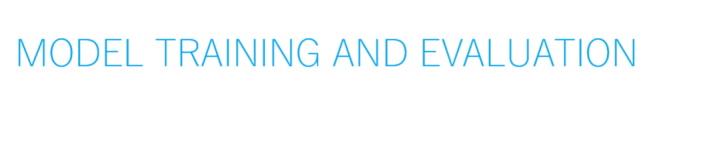

## I Will Use K-Means Clustering for Creating Clusters of People based on their activity

In [21]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(X)
model.inertia_

# I have initialized total clusters as 5, which is giving very low score( inertia). 


1.8390319852964838e-29

### FIND OUT THE OPTIMAL VALUE OF K ( Total Clusters)

In [22]:
from sklearn.metrics import silhouette_score
k=5
wcss_scores = []
for i in range(1,k+1):
    model = KMeans(n_clusters=i)
    model.fit(X)
    wcss_scores.append(model.inertia_)
    
    

In [23]:
wcss_scores

[219.93999999999994,
 95.37254901960785,
 4.705882352941177,
 1.8390319852964838e-29,
 1.8390319852964838e-29]

<Axes: >

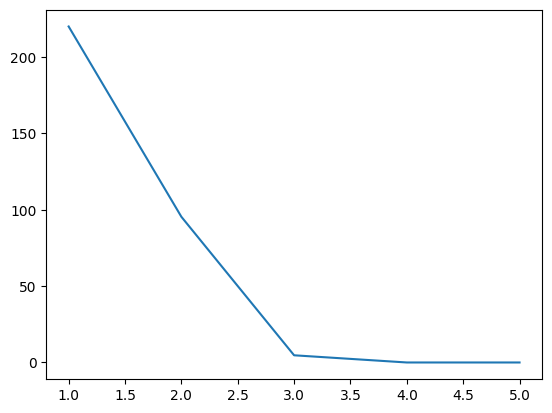

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=range(1,k+1),y=wcss_scores)

## Using the elbow method, optimal number of clusters is 3

In [25]:

final_model = KMeans(n_clusters = 3)
clusters=final_model.fit_predict(X)

In [26]:
final_model.labels_

array([2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1], dtype=int32)

##### I will merge Cancer Probability from our original data to X, and check the relationship between Cluster and Probability Score


In [27]:
X['Probability']=df['Probability of Cancer']

In [28]:
X['Cluster']=clusters

In [29]:
X.head()

,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability,Cluster
0,0,3,1,1,1,0.8,2
1,1,2,0,0,0,0.2,0
2,3,3,0,0,0,0.1,0
3,0,3,1,1,1,0.9,2
4,2,1,2,2,2,0.4,1


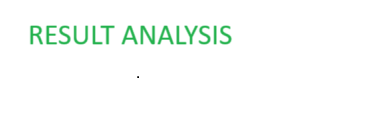

Text(0.5, 1.0, 'KMEANS CLUSTERS Vs. PROBABILITY OF CANCER')

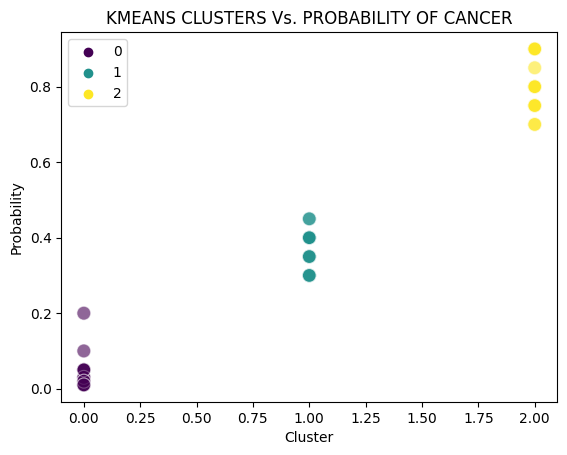

In [30]:
sns.scatterplot(x='Cluster',y='Probability',data=X,hue=clusters,palette='viridis',s=100, alpha=0.6, edgecolor='w')
plt.title("KMEANS CLUSTERS Vs. PROBABILITY OF CANCER")

# K Means has clusters the People based on their habits into 3 groups. 

## Each cluster is plotted against the probability score. 


## PREDICTION

#### *Lets create a sample with a person who moderately Walks, moderately jogs, uses bike frequently, but is a heavy drinker but doesnot smoke. How much prone is he to Cancer . I hope he doesnt :)*

In [31]:
test_data = pd.DataFrame()
test_data['Smoking Habit']=[]
test_data['Drinking Habit']=['Heavy']
test_data['Biking Habit']=['High']
test_data['Walking Habit']=['Medium']
test_data['Jogging Habit']=['Medium']


In [32]:
## Applying Uniformity  Smoking and Drinking drinking values with Walking,Jogging,Biking
test_data['Smoking Habit']=test_data['Smoking Habit'].apply(lambda s:uniformity(s))
test_data['Drinking Habit']=test_data['Drinking Habit'].apply(lambda s:uniformity(s))



In [33]:
test_data

,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit
0,None,High,High,Medium,Medium


#### Lets encode the above values using our encoder we created above

In [34]:
test_data['Smoking Habit']=encoder.transform(test_data['Smoking Habit'])
test_data['Drinking Habit']=encoder.transform(test_data['Drinking Habit'])
test_data['Biking Habit']=encoder.transform(test_data['Biking Habit'])
test_data['Walking Habit']=encoder.transform(test_data['Walking Habit'])
test_data['Jogging Habit']=encoder.transform(test_data['Jogging Habit'])


In [35]:
test_data

,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit
0,3,0,0,2,2


In [36]:
final_model.predict(test_data)

array([1], dtype=int32)